In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/ipazc/mtcnn.git

fatal: destination path 'mtcnn' already exists and is not an empty directory.


In [ ]:
cd  "FileName"

/content/drive/MyDrive/휴먼프밍3조


In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install keras 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install Pillow numpy opencv-python matplotlib sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mtcnn import MTCNN

In [ ]:
# 케라스 FaceNet 모델 로드 예시
from keras.models import load_model
# 모델 불러오기
model = load_model('FileName')
# 입력과 출력 배열 형태 요약
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [ ]:
import mtcnn
# mtcnn으로 얼굴을 감지하는 함수
from PIL import Image
from numpy import asarray,savez_compressed
import numpy
from mtcnn.mtcnn import MTCNN
#print(mtcnn.__version__)
import os
import matplotlib.pyplot as plt
import random

데이터 확인

In [ ]:
fake_folder = 'FileName/fake/'
real_folder = 'FileName/real/'
print( "fake 데이터셋 개수 : ",len(os.listdir(fake_folder)),"real 데이터셋 개수 : ",len(os.listdir(real_folder)))

fake 데이터셋 개수 :  252 real 데이터셋 개수 :  56


In [ ]:
def extract_face(filename, required_size=(160, 160)):
	# 파일에서 이미지 불러오기
	image = Image.open(filename)
	# RGB로 변환, 필요시
	image = image.convert('RGB')
	# 배열로 변환
	pixels = asarray(image)
	# 감지기 생성, 기본 가중치 이용
	detector = MTCNN()
	# 이미지에서 얼굴 감지
	results = detector.detect_faces(pixels)
	# 첫 번째 얼굴에서 경계 상자 추출
	x1, y1, width, height = results[0]['box']
	# 버그 수정
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# 얼굴 추출
	face = pixels[y1:y2, x1:x2]
	# 모델 사이즈로 픽셀 재조정
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array


폴더를 플롯으로 구체화하기

In [ ]:
folder = 'FileName/fake/'
i = 1
errorList = []
# 파일 열거
for filename in os.listdir(folder):
	# 경로
	path = folder + filename
	# 얼굴 추출
	try:
		face = extract_face(path)
		print(i, face.shape)
	except:
		errorList.append(filename)

	i += 1


1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)
15 (160, 160, 3)
16 (160, 160, 3)
17 (160, 160, 3)
18 (160, 160, 3)
19 (160, 160, 3)
20 (160, 160, 3)
21 (160, 160, 3)
22 (160, 160, 3)
23 (160, 160, 3)
24 (160, 160, 3)
25 (160, 160, 3)
26 (160, 160, 3)
27 (160, 160, 3)
28 (160, 160, 3)
29 (160, 160, 3)
30 (160, 160, 3)
31 (160, 160, 3)
32 (160, 160, 3)
33 (160, 160, 3)
34 (160, 160, 3)
35 (160, 160, 3)
36 (160, 160, 3)
37 (160, 160, 3)
38 (160, 160, 3)
39 (160, 160, 3)
40 (160, 160, 3)
41 (160, 160, 3)
42 (160, 160, 3)
43 (160, 160, 3)
44 (160, 160, 3)
45 (160, 160, 3)
46 (160, 160, 3)
47 (160, 160, 3)
48 (160, 160, 3)
49 (160, 160, 3)
50 (160, 160, 3)
51 (160, 160, 3)
52 (160, 160, 3)
53 (160, 160, 3)
54 (160, 160, 3)
55 (160, 160, 3)
56 (160, 160, 3)
57 (160, 160, 3)
58 (160, 160, 3)
59 (160, 160, 3)
60 (16

In [ ]:
def load_faces(directory):
	faces = list()
	# 파일 열거
	for filename in os.listdir(directory):
		# 경로
		path = directory + filename
		# 얼굴 추출
		face = extract_face(path)
		# 저장
		faces.append(face)
	return faces

# 이미지를 포함하는 각 클래스에 대해 하나의 하위 디렉토리가 포함된 데이터셋을 불러오기
def load_dataset(directory):
	X, y = list(), list()
	# 클래스별로 폴더 열거
	for subdir in os.listdir(directory):
		# 경로
		path = directory + subdir + '/'
		# 디렉토리에 있을 수 있는 파일을 건너뛰기(디렉토리가 아닌 파일)
		if not os.path.isdir(path):
			continue
		# 하위 디렉토리의 모든 얼굴 불러오기/ fake일때 real 개수와 맞춰주는 조건
		faces = load_faces(path)
		if (subdir=='fake'):
			order = int(input('맞춰줄 값'))
			faces = random.sample(faces, order)
		# 레이블 생성
		labels = [subdir for _ in range(len(faces))]
		# 진행 상황 요약 
		print('>%d개의 예제를 불러왔습니다. 클래스명: %s' % (len(faces), subdir))
		# 저장
		X.extend(faces)
		y.extend(labels)
	
	return asarray(X), asarray(y)

# 훈련 데이터셋 불러오기


In [ ]:
trainX, trainy = load_dataset('FileName')
#trainy = numpy.random.choice(trainy,56, replace=False) 
print(trainX.shape,trainy.shape)

>56개의 예제를 불러왔습니다. 클래스명: real
맞춰줄 값56
>56개의 예제를 불러왔습니다. 클래스명: fake
(112, 160, 160, 3) (112,)


In [ ]:
testX, testy = load_dataset('FileName/val/')
print(testX.shape, testy.shape)

>20개의 예제를 불러왔습니다. 클래스명: real
맞춰줄 값20
>20개의 예제를 불러왔습니다. 클래스명: fake
(40, 160, 160, 3) (40,)


In [ ]:
trainX[:3,:3,:3,:3]

array([[[[105, 144, 121],
         [102, 129, 110],
         [ 87, 105,  87]],

        [[ 81, 108,  89],
         [ 77,  92,  77],
         [ 70,  77,  64]],

        [[ 71,  88,  72],
         [ 64,  68,  56],
         [ 62,  58,  48]]],


       [[[182, 224, 190],
         [181, 225, 190],
         [181, 225, 190]],

        [[181, 225, 190],
         [181, 225, 190],
         [181, 225, 190]],

        [[181, 225, 190],
         [180, 224, 189],
         [180, 224, 189]]],


       [[[225, 231, 187],
         [225, 231, 188],
         [226, 231, 190]],

        [[226, 232, 187],
         [226, 232, 188],
         [226, 231, 190]],

        [[226, 232, 189],
         [226, 232, 188],
         [226, 231, 190]]]], dtype=uint8)

In [ ]:
trainy[:3,]

array(['real', 'real', 'real'], dtype='<U4')

In [ ]:
trainy[56:,] #trainy는 56번째부터 fake로 나눠짐

array(['fake', 'fake', 'fake', 'fake', 'fake', 'fake', 'fake', 'fake',
       'fake', 'fake', 'fake', 'fake', 'fake', 'fake', 'fake', 'fake',
       'fake', 'fake', 'fake', 'fake', 'fake', 'fake', 'fake', 'fake',
       'fake', 'fake', 'fake', 'fake', 'fake', 'fake', 'fake', 'fake',
       'fake', 'fake', 'fake', 'fake', 'fake', 'fake', 'fake', 'fake',
       'fake', 'fake', 'fake', 'fake', 'fake', 'fake', 'fake', 'fake',
       'fake', 'fake', 'fake', 'fake', 'fake', 'fake', 'fake', 'fake'],
      dtype='<U4')

In [ ]:
savez_compressed('FileName/faces-dataset.npz', trainX, trainy, testX, testy)

에러 해결( 어두운 이미지 ) - > 폴더

In [ ]:
errorList

[]

In [ ]:
folder = 'FileName/train_data_set/real/'
i = 1
errorList = []
# 파일 열거
for filename in os.listdir(folder):
	# 경로
	path = folder + filename
	# 얼굴 추출
	try:
		face = extract_face(path)
		print(i, face.shape)
	except:
		errorList.append(filename)

	i += 1

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)
15 (160, 160, 3)
16 (160, 160, 3)
17 (160, 160, 3)
18 (160, 160, 3)
19 (160, 160, 3)
20 (160, 160, 3)
21 (160, 160, 3)
22 (160, 160, 3)
23 (160, 160, 3)
24 (160, 160, 3)
25 (160, 160, 3)
26 (160, 160, 3)
27 (160, 160, 3)
28 (160, 160, 3)
29 (160, 160, 3)
30 (160, 160, 3)
31 (160, 160, 3)
32 (160, 160, 3)
33 (160, 160, 3)
34 (160, 160, 3)
35 (160, 160, 3)
36 (160, 160, 3)
37 (160, 160, 3)
38 (160, 160, 3)
39 (160, 160, 3)
40 (160, 160, 3)
41 (160, 160, 3)
42 (160, 160, 3)
43 (160, 160, 3)
44 (160, 160, 3)
45 (160, 160, 3)
46 (160, 160, 3)
47 (160, 160, 3)
48 (160, 160, 3)
49 (160, 160, 3)
50 (160, 160, 3)
51 (160, 160, 3)
52 (160, 160, 3)
53 (160, 160, 3)
54 (160, 160, 3)
55 (160, 160, 3)
56 (160, 160, 3)


In [ ]:
print(errorList)

[]


load() 넘파이 함수를 이용해 우리의 감지된 얼굴 데이터셋을 불러오기

In [ ]:
#from keras.saving.saved_model.load import load
# 얼굴 데이터셋 불러오기
data = numpy.load('FileName/faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('불러오기: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

불러오기:  (112, 160, 160, 3) (112,) (40, 160, 160, 3) (40,)


얼굴을 얼굴 임베딩으로 변환할 준비가 된 FaceNet 모델을 불러오기

In [ ]:
model = load_model('facenet_keras.h52')
print('모델 불러오기')

모델 불러오기


훈련 및 테스트 데이터셋의 각각의 얼굴을 얼굴 임베딩으로 변환

In [ ]:
# facenet을 이용해 데이터셋 내 각 얼굴에 대한 얼굴 임베딩 계산
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model

# 하나의 얼굴의 얼굴 임베딩 얻기
def get_embedding(model, face_pixels):
	# 픽셀 값의 척도
	face_pixels = face_pixels.astype('int32')
	# 채널 간 픽셀값 표준화(전역에 걸쳐)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# 얼굴을 하나의 샘플로 변환
	samples = expand_dims(face_pixels, axis=0)
	# 임베딩을 갖기 위한 예측 생성
	yhat = model.predict(samples)
	return yhat[0]

# 훈련 셋에서 각 얼굴을 임베딩으로 변환하기
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# 테스트 셋에서 각 얼굴을 임베딩으로 변환하기
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# 배열을 하나의 압축 포맷 파일로 저장
savez_compressed('/content/drive/MyDrive/휴먼프밍3조/faces-dataset-embeddings.npz', newTrainX, trainy, newTestX, testy)

(112, 128)
(40, 128)


## 얼굴 분류하기 및 정확도 구하기


In [ ]:
#얼굴 임베딩 데이터셋을 불러오기 / 얼굴 데이터셋으로 분류기 개발
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

# 데이터셋 불러오기
data = load('/FileName/faces-dataset-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('데이터셋: 훈련 %d개, 테스트 %d개' % (trainX.shape[0], testX.shape[0]))


# 입력 벡터 일반화
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# 목표 레이블 암호화
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# 모델 맞추기(적합시키기)
model = SVC(kernel='linear')
model.fit(trainX, trainy)
# 추측
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# 정확도 점수
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)

# 요약
print('정확도: 훈련=%.3f, 테스트=%.3f' % (score_train*100, score_test*100))

데이터셋: 훈련 112개, 테스트 40개
정확도: 훈련=73.214, 테스트=57.500


## 테스트 데이터셋에서 주어진 본 적 없는 사진의 정체성을 예측

예상: real (50.810)
추측(임의의 예제): fake


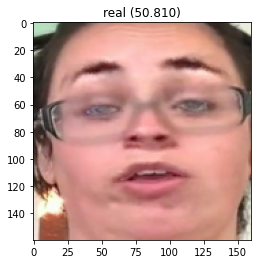

In [ ]:
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot

# 얼굴 불러오기
data = load('FileName/faces-dataset.npz')
testX_faces = data['arr_2']
# 얼굴 임베딩 불러오기
data = load('/FileName/faces-dataset-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']


# 입력 벡터 일반화
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# 목표 레이블 암호화
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# 모델 적합
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# 테스트 데이터셋에서 임의의 예제에 대한 테스트 모델
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# 얼굴 예측
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# 이름 얻기
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('예상: %s (%.3f)' % (predict_names[0], class_probability))
print('추측(임의의 예제): %s' % random_face_name[0])
# 재미삼아 그리기
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()